 
1. Using the interpolated data obtained for $ f(x) = x^2\ln(x)$ where x = [1, e], in the previous assignment, find the area under the curve in the same interval using Composite Trapeziodal rule (CTR) and Composite Simpson’s rule (CSR).
Compare it with the exact integral $\int_{1}^{e}x^2\ln(x) dx$, and also compute the analytical upper bound on error thus incurred from the error formulae for CTR and CSR.

In [8]:
import numpy as np

def f(x):
    return (x**2)*np.log(x)

X=[1,np.exp(0.25),np.exp(0.50),np.exp(0.75),np.exp(1)]
y=[]
n=len(X)

for i in range(n):
    y.append(f(X[i]))   

def F(xp): # we define a function for Lagrange Interpolation Method
    yp=0
    m=len(X)
    n=m-1 # degree of the polynomial
    for i in range(n+1):
        p=1
        for j in range(n+1):
            if i!=j:
                p*=(xp-X[j])/(X[i]-X[j])
        yp+=p*y[i]
    return yp

a_CTR=0.0
a_CSR=0.0 

x=np.linspace(1,np.exp(1),num=5) # We use interpolated function for finding area under curve
h=(np.exp(1)-1)/5
N=len(x)

for j in range(N-1):
    dx=x[j+1]-x[j]
    a_CTR+=(F(x[j])+F(x[j+1]))*0.5*dx # Composite Trapeziodal rule (CTR)
    a_CSR+=(1/float(6))*(F(x[j])+4*F((x[j]+x[j+1])/2)+F(x[j+1]))*dx # Composite Simpsons rule (CSR)

print("Area under the curve using Composite Trapeziodal rule (CTR) is "
      +str(round(a_CTR,4))+" & Composite Simpson’s rule (CSR) is "+str(round(a_CSR,4)))
h

Area under the curve using Composite Trapeziodal rule (CTR) is 4.6848 & Composite Simpson’s rule (CSR) is 4.5748


0.343656365691809

In [10]:
from sympy import * 
x=symbols("x") # exact integral 
exact_integral=integrate((x**2)*log(x),(x,1,np.exp(1)))
print("exact_integral "+str(round(exact_integral,4)))

exact_integral 4.5746


In [11]:
e_CTR=abs((a_CTR-exact_integral)/exact_integral)*100
e_CSR=abs((a_CSR-exact_integral)/exact_integral)*100
print("% relative difference b/w area under the curve using CTR & exact integral is "
      +str(round(e_CTR,4)))
print("% relative difference b/w area under the curve using CSR & exact integral is "
      +str(round(e_CSR,4)))

% relative difference b/w area under the curve using CTR & exact integral is 2.4092
% relative difference b/w area under the curve using CSR & exact integral is 0.0043


# 
2 . The Indian mathematician, Bhaskara I (∼ CE 600-680), gave an algebraic formula for
sin(x) as

$$\sin_B(x) ≈ (16x(\pi − x))/(5\pi^2− 4x(\pi − x))$$,where 0 ≤ x ≤ π, and x is in radians.

(a) Plot the functions $\sin(x)$ and $\sin_B(x)$, and also their percentage relative difference with respect to $\sin(x)$ separately.

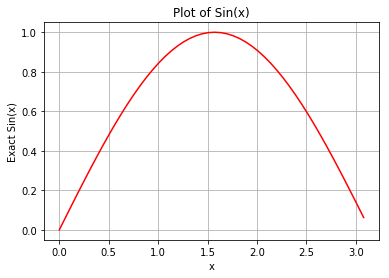

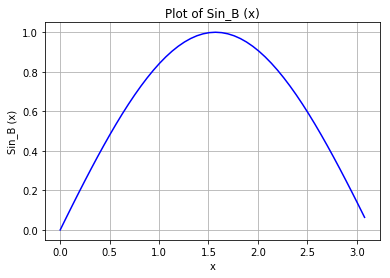

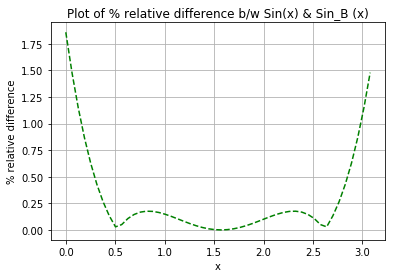

In [29]:
import numpy as np

def f_b(x):
    return float(16*x*(np.pi-x))/float(5*np.pi**2-4*x*(np.pi-x))

def f(x):
    return np.sin(x)

x=np.linspace(0.0001,np.pi,50,endpoint=False)
y=[]
for i in x:
    y.append(f_b(i))

import matplotlib.pyplot as plt

plt.plot(x,f(x),"r")
plt.xlabel("x")
plt.ylabel("Exact Sin(x)")
plt.title("Plot of Sin(x)")
plt.grid()
plt.show()

plt.plot(x,y,"b")
plt.xlabel("x")
plt.ylabel("Sin_B (x)")
plt.title("Plot of Sin_B (x)")
plt.grid()
plt.show()

plt.plot(x,abs((y-f(x))/f(x))*100,"g--")
plt.xlabel("x")
plt.ylabel("% relative difference")
plt.title("Plot of % relative difference b/w Sin(x) & Sin_B (x)")
plt.grid()
plt.show()

(b) Compute the area under the curve f(x) = $\sin_B(x)$ and the true function $f^{*}(x) =\sin(x)$ using CTR and CSR for x = $[0, \frac{\pi}{2}]$.

In [24]:
def F(x):
    return np.sin(x)

x=[0,np.pi/2]
n=len(x)
sin_CTR=0.0
sin_CSR=0.0 

for j in range(n-1):
    dx=x[j+1]-x[j]
    sin_CTR+=(F(x[j])+F(x[j+1]))*0.5*dx # Composite Trapeziodal rule (CTR)
    sin_CSR+=(1/float(6))*(F(x[j])+4*F((x[j]+x[j+1])/2)+F(x[j+1]))*dx # Composite Simpsons rule (CSR)

print("area under the curve f(x) = Sin(x) using CTR is "+str(round(sin_CTR,5))
      +" & using CTR is "+str(round(sin_CSR,5)))

area under the curve f(x) = Sin(x) using CTR is 0.7854 & using CTR is 1.00228


In [23]:
def F(x):
    return float(16*x*(np.pi-x))/float(5*np.pi**2-4*x*(np.pi-x))

x=[0,np.pi/2]
n=len(x)
sin_B_CTR=0.0
sin_B_CSR=0.0 

for j in range(n-1):
    dx=x[j+1]-x[j]
    sin_B_CTR+=(F(x[j])+F(x[j+1]))*0.5*dx # Composite Trapeziodal rule (CTR)
    sin_B_CSR+=(1/float(6))*(F(x[j])+4*F((x[j]+x[j+1])/2)+F(x[j+1]))*dx #Composite Simpsons rule(CSR)
print("area under the curve f(x) = Sin_B (x) using CTR is "
      + str(round(sin_B_CTR,5))+" & using CSR is "+str(round(sin_B_CSR,5)))

area under the curve f(x) = Sin_B (x) using CTR is 0.7854 & using CSR is 1.001


(c) Compare them with the exact integral $\int_0 ^{\pi/2}\sin(x) dx$.

In [14]:
from sympy import * # exact integral 
x=symbols("x")
exact_integral=integrate(sin(x),(x,0,np.pi/2))
print("Exact Integral = "+str(round(exact_integral,4)))

Exact Integral = 1.0


In [21]:
error_sin_B_CTR=(abs(sin_B_CTR-exact_integral)/exact_integral)*100
error_sin_B_CSR=(abs(sin_B_CSR-exact_integral)/exact_integral)*100
print("% error in area under the curve Sin_B (x) & exact integral of Sin(x) using CTR is "
      + str(round(error_sin_B_CTR,4))+" % & using CSR is "+str(round(error_sin_B_CSR,4))+" %")

% error in area under the curve Sin_B (x) & exact integral of Sin(x) using CTR is 21.4602 % & using CSR is 0.0998 %


In [22]:
error_sin_CTR=(abs(sin_CTR-exact_integral)/exact_integral)*100
error_sin_CSR=(abs(sin_CSR-exact_integral)/exact_integral)*100
print("% error in area under the curve Sin(x) & exact integral of Sin(x) using CTR is "
      + str(round(error_sin_CTR,4))+" % & using CSR is "+str(round(error_sin_CSR,5))+" %")

% error in area under the curve Sin(x) & exact integral of Sin(x) using CTR is 21.4602 % & using CSR is 0.22799 %
